<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA4_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Zac Cowan**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [7]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [9]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [12]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/banknote_authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [13]:
x = df.drop("forgery", axis=1)
y = df["forgery"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [15]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, x.columns)
    ]
)

### Executing the Model

In [20]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", DecisionTreeClassifier())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

### Evaluating Model

In [21]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9781818181818182
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



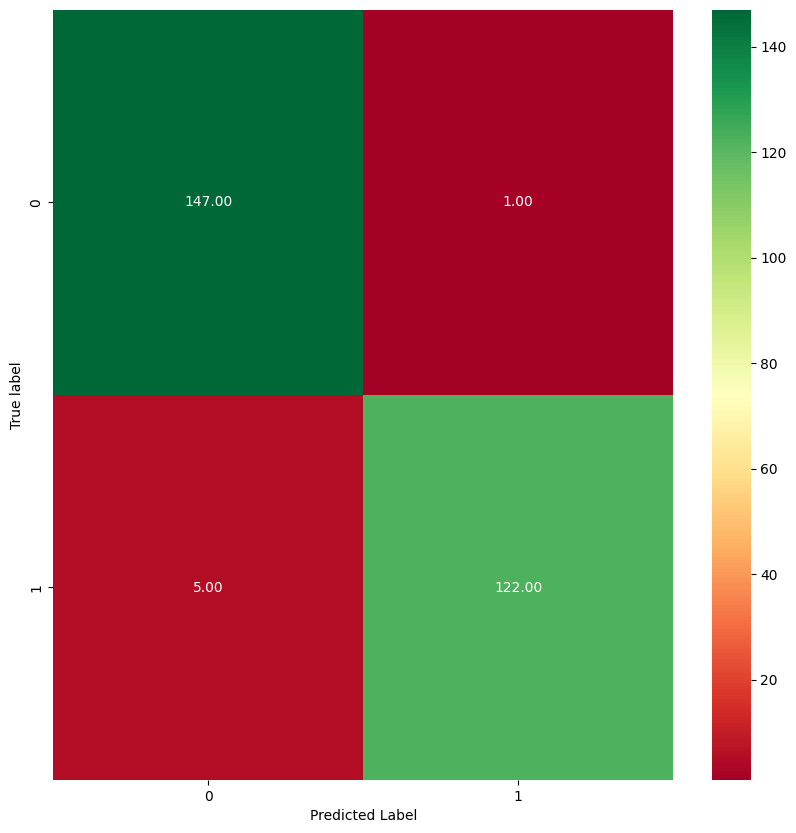

In [22]:
plot_cm(y_test, y_pred)

### Conclusion
Based on the metrics and confusion matrix, this model performed very well, only incorrectly predicting 6 labels out of 275.

The accuracy was 97.8%

## Problem 2

### Reading the Data

In [23]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [24]:
df.rename(columns={
    "Usage_kWh": "usage_kwh",
    "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh",
    "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh",
    "Lagging_Current_Power_Factor": "lag_current_pwr",
    "Leading_Current_Power_Factor": "lead_current_pwr",
    "NSM": "nsm",
    "WeekStatus": "week_status",
    "Day_of_week": "day_of_week",
    "Load_Type": "load_type"},
             inplace=True
             )

In [25]:
df.sample(5)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
25231,20/09/2018 20:00,41.11,19.69,0.00,0.02,90.19,100.00,72000,Weekday,Thursday,Medium_Load
10545,20/04/2018 20:30,16.24,0.00,18.76,0.01,100.00,65.45,73800,Weekday,Friday,Medium_Load
678,08/01/2018 01:45,4.00,5.83,0.00,0.00,56.57,100.00,6300,Weekday,Monday,Light_Load
16902,26/06/2018 01:45,2.59,3.46,0.00,0.00,59.93,100.00,6300,Weekday,Tuesday,Light_Load
19214,20/07/2018 03:45,2.81,5.15,0.00,0.00,47.90,100.00,13500,Weekday,Friday,Light_Load


### Splitting Data into Train/Test

In [26]:
x = df.drop(["date", "usage_kwh"], axis=1)
y = df["usage_kwh"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [28]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [29]:
numerical_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

### Executing the Model

In [31]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regression", DecisionTreeRegressor())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regression', DecisionTreeRegressor())])

### Evaluating Model

In [32]:
print("Metrics on testing data split")
y_pred = pipeline.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error (test): ", mean_squared_error(y_test, y_pred, squared=False))

Metrics on testing data split
R2 Score:  0.9980225729472063
Mean Squared Error (test):  1.4992616523752966


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
print("Metrics on training data split")
y_pred_train = pipeline.predict(x_train)

print("R2 Score: ", r2_score(y_train, y_pred_train))
print("Root Mean Squared Error (train): ", mean_squared_error(y_train, y_pred_train, squared=False))

Metrics on training data split
R2 Score:  1.0
Root Mean Squared Error (train):  2.0016587672173784e-16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Conclusion

The model had an exception r2 score: 0.998.
The root mean squared error was very low given the broad value range present in the usage_kwh column.